# INFO 370 Problem Set 7: Logistic Regression, Prediction
*Name:* Israel Martinez

## 1 Who will win the elections? (50pt)
This question asks you to do a simple election model. We are looking for the U.S. 2020 presidential elections by counties. Your task is to model the winner (1/0 for democrats winning the presidential elections in this county), and explain the winner using population density, minority population, education level, income, and geographic differences (the census region).

The data file is called us-elections_2000-2020.csv.bz2. The variables are

FIPS - county FIPS code

year - election year

state - state name

state2 - 2-letter state code

region - census region (west, midwest, south, northeast)

county county name

office - President (we look only at presidential elections)

candidate - name of the candidate

party - party of the candidate

candidatevotes - votes received by this candidate for this particular party

totalvotes - total number of votes cast in this county-year

income - personal income, USD/per capita (BEA data)

population - population, census estimate (BEA data)

LND010200D - land area (sq.mi) at 2000 (Census data)

EDU600209D - Persons 25 years and over, total 2005-2009

EDU695209D - Educational attainment - persons 25 years and over - bachelor’s degree 2005-2009

POP010210D - Resident population (April 1 - complete count) 2010

POP220210D - Population of one race - White alone 2010 (complete count)

POP250210D - Population of one race - Black or African American alone 2010 (complete count)

POP320210D - Population of one race - Asian alone 2010 (complete count)

POP400210D - Hispanic or Latino population 2010 (complete count)

PST110209D - Resident total population estimate, net change - April 1, 2000 to July 1, 2009

The complex variable names originate from the US Census.

1. (2pt) Load data, and do basic sanity checks.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [6]:
usa = pd.read_csv("./data/us-elections_2000-2020.csv.bz2", sep="\t")
usa.head()

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
3,1001,2004,Alabama,AL,Autauga,President,George W. Bush,republican,15196.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
4,1001,2008,Alabama,AL,Autauga,President,Barack Obama,democrat,6093.0,23641,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south


In [7]:
usa.shape

(37390, 22)

In [8]:
usa.isna().sum()

FIPS                 0
year                 0
state                0
state2               0
county               0
office               0
candidate            0
party                0
candidatevotes       4
totalvotes           0
income            6762
population        6762
LND010200D           0
EDU695209D           0
EDU600209D           0
POP010210D           0
POP220210D           0
POP250210D           0
POP320210D           0
POP400210D           0
PST110209D           0
region               0
dtype: int64

2. (5pt) You are going to work with 2020 data. However, some important information for 2020 is missing. Fill the missings with the most recent values that exist in the data.

    Hint: check out DataFrame.fillna method. Ensure you order your observations right and do not fill missings with values from other counties!

In [12]:
usa['FIPS2'] = usa.FIPS
usa2 = usa.groupby('FIPS2', as_index=True).fillna(method='ffill')
usa2.isna().sum()

FIPS                0
year                0
state               0
state2              0
county              0
office              0
candidate           0
party               0
candidatevotes      2
totalvotes          0
income            644
population        644
LND010200D          0
EDU695209D          0
EDU600209D          0
POP010210D          0
POP220210D          0
POP250210D          0
POP320210D          0
POP400210D          0
PST110209D          0
region              0
dtype: int64

3. (13pt) Make a new data frame that only contains 2020 data, and that contains a binary variable: the county went to democrats in 2020.

    Note: you have to build that variable using two lines of data in the original data frame by FIPS after the data is ordered by year.

In [22]:
usa2 = usa2[usa2.year == 2020]
usa2 = usa2.dropna()
usa2 = usa2[usa2['party'] == "democrat"]
usa2['dem_pct'] = usa2['candidatevotes'] / usa2['totalvotes']
usa2['dem_win'] = np.where(usa2.dem_pct >= 0.5, 1, 0)
usa2.head()

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region,dem_pct,dem_win
11,1001,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,...,31469,54571,42855,9643,474,1310,7085,south,0.270184,0
23,1003,2020,Alabama,AL,Baldwin County,President,Joshep Biden,democrat,24578.0,109679,...,118585,182265,156153,17105,1348,7992,39463,south,0.224090,0
35,1005,2020,Alabama,AL,Barbour County,President,Joshep Biden,democrat,4816.0,10518,...,19791,27457,13180,12875,107,1387,699,south,0.457882,0
47,1007,2020,Alabama,AL,Bibb County,President,Joshep Biden,democrat,1986.0,9595,...,14489,22915,17381,5047,22,406,1698,south,0.206983,0
59,1009,2020,Alabama,AL,Blount County,President,Joshep Biden,democrat,2640.0,27588,...,38472,57322,53068,761,117,4626,7323,south,0.095694,0


In [24]:
usa2.dem_win.value_counts()

0    2581
1     478
Name: dem_win, dtype: int64

4. (12pt) Create auxiliary variables: population density (population divided by land area); minority percentage; and percentage of college graduates. These can be made of different variables, and as none of these are changing fast, it should not have much of an impact.

    Ensure the variables are in a reasonable range!

    Hint: there are values that do not make sense. Remove those.
    
The variable for population divided by land area is LND010200D.

In [26]:
usa2['pop_dens'] = ((usa2.population) * 1000 / usa2.LND010200D)

The variables for minority percentage are POP250210D (Black or African American), POP320210D (Asian), and POP400210D (Hispanic or Latino). POP010210D represents the total population.

In [28]:
usa2['minor_pct'] = ((usa2.POP250210D + usa2.POP320210D 
                      + usa2.POP400210D) * 100 / usa2.POP010210D)

The variable for Educational attainment is EDU695209D and the variable for persons 25 and over is EDU600209D.

In [32]:
usa2['grad_pct'] = ((usa2.EDU695209D / usa2.EDU600209D)) * 100
usa2 = usa2.replace([np.inf, -np.inf], np.nan)\
.dropna(subset= ['pop_dens', 'minor_pct', 'grad_pct', 'income'])

In [33]:
usa2.head(5)

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,POP250210D,POP320210D,POP400210D,PST110209D,region,dem_pct,dem_win,pop_dens,minor_pct,grad_pct
11,1001,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,...,9643,474,1310,7085,south,0.270184,0,91393.829101,20.939693,7.261114
23,1003,2020,Alabama,AL,Baldwin County,President,Joshep Biden,democrat,24578.0,109679,...,17105,1348,7992,39463,south,0.224090,0,102421.395904,14.509094,9.153772
35,1005,2020,Alabama,AL,Barbour County,President,Joshep Biden,democrat,4816.0,10518,...,12875,107,1387,699,south,0.457882,0,28530.049087,52.332738,5.295336
47,1007,2020,Alabama,AL,Bibb County,President,Joshep Biden,democrat,1986.0,9595,...,5047,22,406,1698,south,0.206983,0,36070.652868,23.892647,3.202429
59,1009,2020,Alabama,AL,Blount County,President,Joshep Biden,democrat,2640.0,27588,...,761,117,4626,7323,south,0.095694,0,88370.734706,9.601898,4.057496


5. (8pt) Estimate logistic regression model where you explain democrats’ vote share with population density, minority percentage, education level, income, and census region.

In [38]:
m = smf.logit("dem_win ~ pop_dens + minor_pct + grad_pct + income + C(region)", data = usa2).fit()
m.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.210873
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                dem_win
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(region)[T.northeast]     0.0816      0.016      5.264      0.000       0.051       0.112
C(region)[T.south]        -0.0934      0.014     -6.540      0.000      -0.121      -0.065
C(region)[T.west]          0.0080      0.015      0.545      0.586      -0.021       0.037
pop_dens                7.068e-08   1.57e-08      4.500      0.000    3.99e-08    1.01e-07
minor_pct                  0.0057      0.000     23.001      0.000       0.005       0.006
grad_pct                   0.0224      0.002     14.907      0.000       0.019       0.025
income                  -3.41e-07   4.34e-07     -0.786      0.432   -1.19e-06    5.09e-07
==========================================================================================
"""

6. (10pt) Interpret the results. Which results are statistically significant?

    Note: you may want to change some of the units, e.g. you may want to measure population density in 1000/per sq mi, instead of persons per sq mi.

According to the logistic regression model above, if the reference region stays the same then we will see an 8% increase in the NE region, 9% decrease in the south, and 0.8% increase in the west for democratic parties. Demographic differences are a bit smaller, with minorities being 0.5% and graduates being 2% more likely to vote democrat.

## 2 Predict AirBnB Price (50pt)
Your next task is to analyze the Beijing AirBnB listing price (variable price). It is downloaded from Inside Airbnb but we suggest to use the version on canvas (airbnb-beijing-listings.csv). You have to work with several sorts of categorical variables, including those that contain way too many too small categories. You are also asked to do log-transforms, interpret the results, and do some predictions.

1. (2pt) Load the data. Select only relevant variables you need below. Even better, check out the usecols argument for read_csv. Do basic sanity checks.

In [85]:
abnb = pd.read_csv("./data/airbnb-beijing-listings.csv.bz2",
                  usecols=['price', 'bedrooms', 'room_type', 
                           'accommodates', 'bathrooms'])
abnb

,room_type,accommodates,bathrooms,bedrooms,price
0,Entire home/apt,9,2.0,3.0,$831.00
1,Private room,2,1.0,1.0,"$1,197.00"
2,Entire home/apt,2,1.0,1.0,$598.00
3,Entire home/apt,2,1.0,1.0,$598.00
4,Entire home/apt,2,1.0,1.0,$598.00
...,...,...,...,...,...
38809,Private room,2,1.0,1.0,$598.00
38810,Entire home/apt,8,3.0,4.0,"$2,175.00"
38811,Private room,6,1.0,1.0,$239.00
38812,Private room,4,1.0,1.0,$225.00


2. (4pt) Do the basic data cleaning:
    
(a) convert price to numeric.
    
(b) remove entries with missing or invalid price, bedrooms, and other variables you need below

In [87]:
# (a)
abnb['price'] = abnb['price'].str.replace('$', '')
abnb['price'] = abnb['price'].str.replace(',', '')
abnb['price'] = pd.to_numeric(abnb.price)

# (b)
abnb = abnb.dropna()
abnb.drop(abnb[abnb['price'] == 0].index, inplace=True)
abnb

<ipython-input-87-02c519f960c3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  abnb['price'] = abnb['price'].str.replace('$', '')


,room_type,accommodates,bathrooms,bedrooms,price
0,Entire home/apt,9,2.0,3.0,831.0
1,Private room,2,1.0,1.0,1197.0
2,Entire home/apt,2,1.0,1.0,598.0
3,Entire home/apt,2,1.0,1.0,598.0
4,Entire home/apt,2,1.0,1.0,598.0
...,...,...,...,...,...
38809,Private room,2,1.0,1.0,598.0
38810,Entire home/apt,8,3.0,4.0,2175.0
38811,Private room,6,1.0,1.0,239.0
38812,Private room,4,1.0,1.0,225.0


3. (5pt) Analyze the distribution of price. Does it look like normal? Does it look like something else? Does it suggest you should do a log-transformation?

    Hint: consult lecture notes Section 4.1.7 Interactions and Feature Transformations."

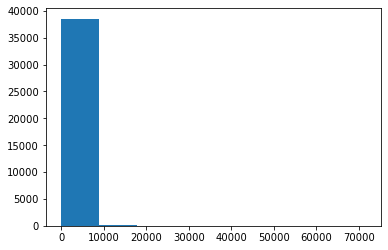

In [88]:
prices = pd.Series(abnb.price)
_ = plt.hist(abnb.price, bins=8)

This doesn't look normal, so it may suggest that I should do a log-transformation.

In [89]:
abnb['logPrice'] = np.log(abnb.price)

4. (5pt) Convert the number of bedrooms into another variable with a limited number of categories only, such as 1, 2, 3, 4+, and use these categories in the models below.

    Hint: consult the python companion for lecture notes http://faculty.washington.edu/otoomet/machinelearning-py/cleaning-data.html#cleaning-data-converting-variables

In [93]:
abnb['beds1'] = pd.cut(abnb.bedrooms, bins=[0, 1, 2, 3, 4, np.inf],
                      labels=["0", "1", "2", "3", "4+"], right=False)
abnb

,room_type,accommodates,bathrooms,bedrooms,price,logPrice,beds1
0,Entire home/apt,9,2.0,3.0,831.0,6.722630,3
1,Private room,2,1.0,1.0,1197.0,7.087574,1
2,Entire home/apt,2,1.0,1.0,598.0,6.393591,1
3,Entire home/apt,2,1.0,1.0,598.0,6.393591,1
4,Entire home/apt,2,1.0,1.0,598.0,6.393591,1
...,...,...,...,...,...,...,...
38809,Private room,2,1.0,1.0,598.0,6.393591,1
38810,Entire home/apt,8,3.0,4.0,2175.0,7.684784,4+
38811,Private room,6,1.0,1.0,239.0,5.476464,1
38812,Private room,4,1.0,1.0,225.0,5.416100,1


5. (6pt) Run an OLS (i.e. fit the linear regression model) where you explain the price with number of bedrooms where bedrooms uses these four categories. Interpret the results, including R^2.

    Hint: if 0-BR is the reference category, the effect for 1BR should be -12.62 (but it may depend on how exactly do you clean data).
    
    R^2 is explained in lecture notes 4.1.3 “Model evaluation: MSE, RMSE, R^2”.

In [94]:
m = smf.ols("price ~ beds1", data=abnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1093.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:24:53   Log-Likelihood:            -3.4133e+05
No. Observations:               38686   AIC:                         6.827e+05
Df Residuals:                   38681   BIC:                         6.827e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     448.8851    107.166      4.189      0.000     238.837     658.933
beds1[T.1]    -11.6223    107.655     -0.108      0.914    -222.628     199.384
beds1[T.2]    295.9590    108.801      2.720      0.007      82.705     509.213
beds1[T.3]    746.0202    111.966      6.663      0.000     526.565     965.476
beds1[T.4+]  2167.8388    111.995     19.357      0.000    1948.326    2387.352
==============================================================================
Omnibus:                    95843.461   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1539629661.103
Skew:                          26.864   Prob(JB):                         0.00
Kurtosis:                     978.842   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

My effect for 1BR is -11.6223, which may be because I didn't clean my data the correct way.

6. (8pt) Now repeat the process with the model where you analyze log price instead of price. Interpret the results. Which model behaves better in the sense of R^2?

    For the following tasks use either log(price) or price, depending on your answer here.

In [95]:
m = smf.ols("logPrice ~ beds1", data=abnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4562.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:29:02   Log-Likelihood:                -40076.
No. Observations:               38686   AIC:                         8.016e+04
Df Residuals:                   38681   BIC:                         8.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.8117      0.044    130.662      0.000       5.724       5.899
beds1[T.1]     -0.0323      0.045     -0.724      0.469      -0.120       0.055
beds1[T.2]      0.5306      0.045     11.749      0.000       0.442       0.619
beds1[T.3]      0.9396      0.046     20.219      0.000       0.848       1.031
beds1[T.4+]     1.5931      0.046     34.272      0.000       1.502       1.684
==============================================================================
Omnibus:                     3876.704   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16891.857
Skew:                           0.418   Prob(JB):                         0.00
Kurtosis:                       6.128   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It looks like the second model behaves better in the sense of R^2.  I will be using log(price) for the following tasks.

In [125]:
abnb.dtypes

room_type         object
accommodates       int64
bathrooms        float64
bedrooms         float64
price            float64
logPrice         float64
beds1              int64
accoms1         category
rmType1            int64
dtype: object

7. (5pt) Include further two variables into the model: room type and accommodates. While room type only contains three values, accommodates contains many different categories. Recode these as “1”, “2”, “3”, “4 and more”. 

    Fit this model. Interpret and comment the more interesting/important results. Do not forget to explain what are the relevant reference categories and R^2.

In [106]:
abnb['rmType1'] = np.where(abnb.room_type == 'Entire home/apt', 1, 0)
abnb['accoms1'] = pd.cut(abnb.accommodates, bins=[1, 2, 3, 4, np.inf],
                        labels=['1', '2', '3', '4 and more'], right=False)

In [111]:
abnb['beds1'] = abnb.beds1.astype(int)

In [112]:
abnb

,room_type,accommodates,bathrooms,bedrooms,price,logPrice,beds1,accoms1,rmType1
0,Entire home/apt,9,2.0,3.0,831.0,6.722630,3,4 and more,1
1,Private room,2,1.0,1.0,1197.0,7.087574,1,2,0
2,Entire home/apt,2,1.0,1.0,598.0,6.393591,1,2,1
3,Entire home/apt,2,1.0,1.0,598.0,6.393591,1,2,1
4,Entire home/apt,2,1.0,1.0,598.0,6.393591,1,2,1
...,...,...,...,...,...,...,...,...,...
38809,Private room,2,1.0,1.0,598.0,6.393591,1,2,0
38810,Entire home/apt,8,3.0,4.0,2175.0,7.684784,4,4 and more,1
38811,Private room,6,1.0,1.0,239.0,5.476464,1,4 and more,0
38812,Private room,4,1.0,1.0,225.0,5.416100,1,4 and more,0


In [145]:
m = smf.ols("logPrice ~ beds1 + accoms1 + rmType1", data=abnb).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     4825.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:36:54   Log-Likelihood:                -38175.
No. Observations:               38686   AIC:                         7.636e+04
Df Residuals:                   38680   BIC:                         7.641e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.9234      0.012    395.739      0.000       4.899       4.948
accoms1[T.2]              0.5010      0.013     37.333      0.000       0.475       0.527
accoms1[T.3]              0.5545      0.017     32.507      0.000       0.521       0.588
accoms1[T.4 and more]     0.8197      0.015     54.844      0.000       0.790       0.849
beds1                     0.1904      0.003     70.652      0.000       0.185       0.196
rmType1                   0.3757      0.008     49.087      0.000       0.361       0.391
==============================================================================
Omnibus:                     7545.586   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65360.870
Skew:                           0.696   Prob(JB):                         0.00
Kurtosis:                       9.214   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model, we got the highest R^2 with 0.38, which means that 38% of what we seen in the spread could be explained by the model.

8. (5pt) Now use the model above to predict (log) price for each listing in your data.

In [138]:
vhat = m.predict()
vhat

array([6.69004145, 5.61483502, 5.99050633, ..., 5.93353451, 5.93353451,
       6.18092414])

9. (5pt) Compute root-mean-squared-error (RMSE) of this prediction. RMSE is explained in lecture notes, 4.1.3 “Model evaluation: MSE,  MSE, R^2”.

In [139]:
e = abnb.price - vhat
np.sqrt(np.mean(e**2))

1863.731402946162

The RMSE of this prediction is 1863.73.

10. (5pt) Now use your model to predict the price for a 2-bedroom apartment that accommodates 4 (i.e. a full 2BR apartment).

In [146]:
abnb10 = abnb[(abnb['beds1'] == 2) & (abnb['accommodates'] >= 4)]
abnb10

,room_type,accommodates,bathrooms,bedrooms,price,logPrice,beds1,accoms1,rmType1
9,Entire home/apt,4,2.0,2.0,669.0,6.505784,2,4 and more,1
13,Entire home/apt,6,1.0,2.0,950.0,6.856462,2,4 and more,1
36,Entire home/apt,4,1.0,2.0,704.0,6.556778,2,4 and more,1
51,Entire home/apt,6,1.0,2.0,690.0,6.536692,2,4 and more,1
65,Entire home/apt,4,1.0,2.0,289.0,5.666427,2,4 and more,1
...,...,...,...,...,...,...,...,...,...
38799,Entire home/apt,4,1.0,2.0,401.0,5.993961,2,4 and more,1
38800,Entire home/apt,5,1.0,2.0,591.0,6.381816,2,4 and more,1
38803,Entire home/apt,4,2.0,2.0,1000.0,6.907755,2,4 and more,1
38804,Entire home/apt,4,1.0,2.0,317.0,5.758902,2,4 and more,1


In [148]:
m2 = smf.ols("logPrice ~ beds1 + accoms1 + rmType1", data=abnb10).fit()
e = abnb10.price - m2.predict()
np.sqrt(np.mean(e**2))

2209.059104820388

I revised the dataframe to only include listings that have 2 bedrooms and accommodates 4 or more. I redid the OLS run and found the RMSE, which is 2209.05.